* The data comes from a longitudinal study of lung tomography measurements of different groups of patients.
  * Download at https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lung-volume.csv

In [9]:
import pandas as pd
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.gofplots import qqplot

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data_url = 'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lung-volume.csv'
lung = pd.read_csv(data_url)

lung.shape

(400, 4)

In [6]:
lung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
group      400 non-null int64
patient    400 non-null object
t1         400 non-null int64
t2         400 non-null int64
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [7]:
lung.head()

,group,patient,t1,t2
0,1,1-1,4226,4497
1,1,1-2,5731,5665
2,1,1-3,3912,4505
3,1,1-4,4811,6472
4,1,1-5,5128,4710


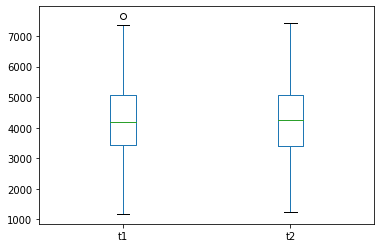

In [15]:
lung[['t1', 't2']].boxplot(grid=False)
plt.show()

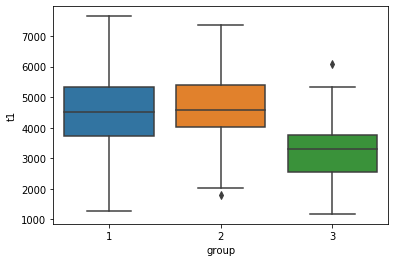

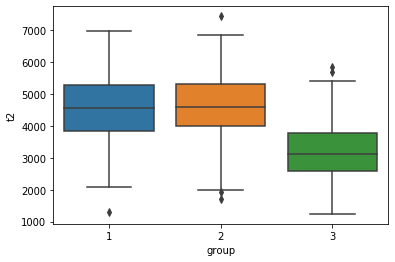

In [20]:
sns.boxplot(x='group', y='t1', data=lung)
plt.show()

sns.boxplot(x='group', y='t2', data=lung)
plt.show()

* For each group, is there a significant difference between time 1 and time 2?

In [28]:
lung['diff'] = lung['t1'] - lung['t2']

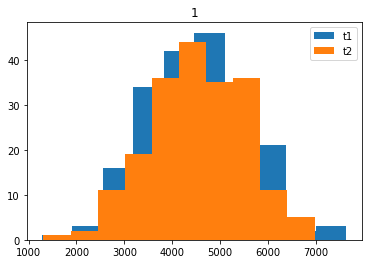

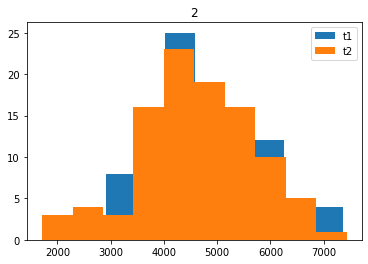

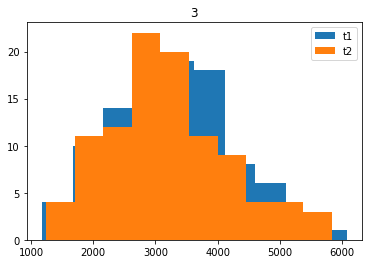

In [29]:
g1 = lung[lung['group'] == 1]
g2 = lung[lung['group'] == 2]
g3 = lung[lung['group'] == 3]

for elem in [g1, g2, g3]:
    plt.hist(elem['t1'], label='t1')
    plt.hist(elem['t2'], label='t2')
    plt.legend()
    plt.title(elem["group"].iloc[0])
    plt.show()

200


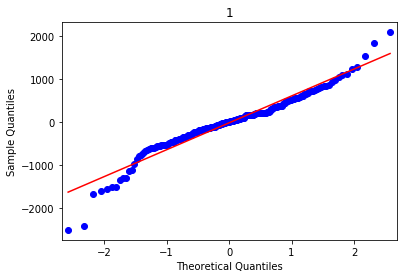

200


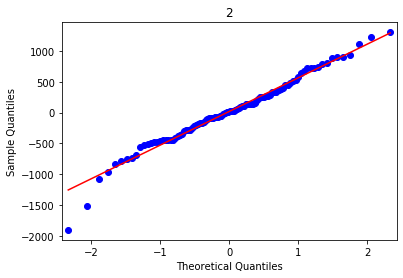

200


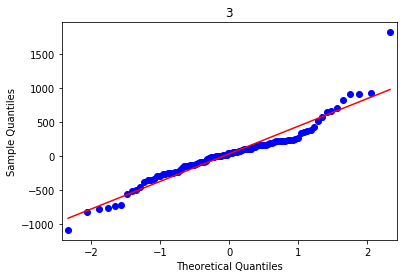

In [31]:
for elem in [g1, g2, g3]:
    print(g1.shape[0])
    qqplot(elem['diff'], line='s')
    plt.title(elem["group"].iloc[0])
    plt.show()

In [33]:
# With multiple tests your brain should consider some multiple test correction
_, p1 = stats.ttest_rel(g1['t1'], g1['t2'])
_, p2 = stats.ttest_rel(g2['t1'], g2['t2'])
_, p3 = stats.ttest_rel(g3['t1'], g3['t2'])

print(p1)
print(p2)
print(p3)

0.7506087664956842
0.7440142766032991
0.37111115842334486


0.016666666666666666

* Is there a significant difference in the mean of all groups at time 2?

Normality assumption check with Shapiro-Wilk.  If `p > alpha` then assumption is met.

In [48]:
_, p = stats.shapiro(g1['t2'])
p

0.8313238024711609

In [49]:
_, p = stats.shapiro(g2['t2'])
p

0.7556766271591187

In [50]:
_, p = stats.shapiro(g3['t2'])
p

0.09609080106019974

Homogeneity of variance assumption check with Bartlett test.  If `p > alpha` then assumption is met.

In [47]:
_, p = stats.bartlett(g1['t2'], g2['t2'], g3['t2'])
p

0.44725904505009795

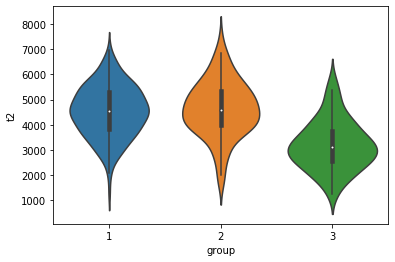

In [36]:
sns.violinplot(x='group', y='t2', data=lung)
plt.show()

In [37]:
stats.f_oneway(g1['t2'], g2['t2'], g3['t2'])

F_onewayResult(statistic=67.65846945026495, pvalue=5.1893599904179e-26)

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,99.705,0.6902,-41.7778,241.1878,False
1,3,-1341.865,0.001,-1483.3478,-1200.3822,True
2,3,-1441.57,0.001,-1604.9402,-1278.1998,True


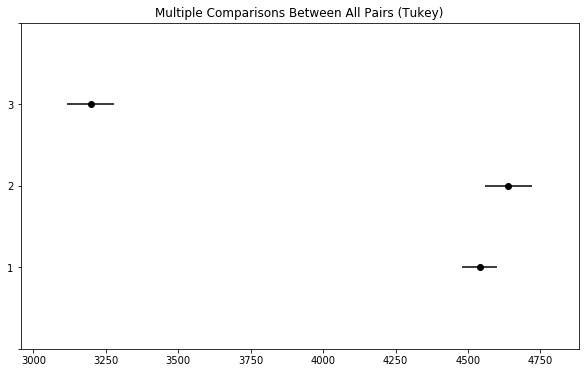

In [46]:
tukey_results = pairwise_tukeyhsd(endog=lung['t2'], groups=lung['group'], alpha=0.5)

display(tukey_results.summary())

tukey_results.plot_simultaneous()
plt.show()